![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
#### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting


# Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.

In [1]:
#imports 
import pandas as pd
import re
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data 
data = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
def to_snake_case(column_names):
    snake_case_names = []
    for name in column_names:
        name = name.lower()
        # replace spaces 
        name = re.sub(r"\s+","_",name)
        snake_case_names.append(name)
    return snake_case_names

In [4]:
data.columns= to_snake_case(data.columns)

In [5]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
#changing "effective_to_date"
data["effective_to_date"] = pd.to_datetime(data["effective_to_date"],format="%m/%d/%y")
data["effective_to_date"]

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [7]:
#Create a NEW dataframe using only the numerical data called _numerical_df_.
numerical_data=data.select_dtypes(np.number)
numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
# Define a function that differentiates between continuous and discrete variables.
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
def numerical_type(data,threshold = 10):
    continous_columns = []
    discrete_columns = []
    
    for column in data.columns:
        if data[column].nunique() > threshold:
            continous_columns.append(column)
        else:
            discrete_columns.append(column)
    continous_df=data[continous_columns]
    discrete_df=data[discrete_columns]
    
    return continous_df,discrete_df

In [10]:
continous_df,discrete_df = numerical_type(numerical_data)

In [11]:
continous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [12]:
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [13]:
#Plot a correlation matrix, comment what you see.

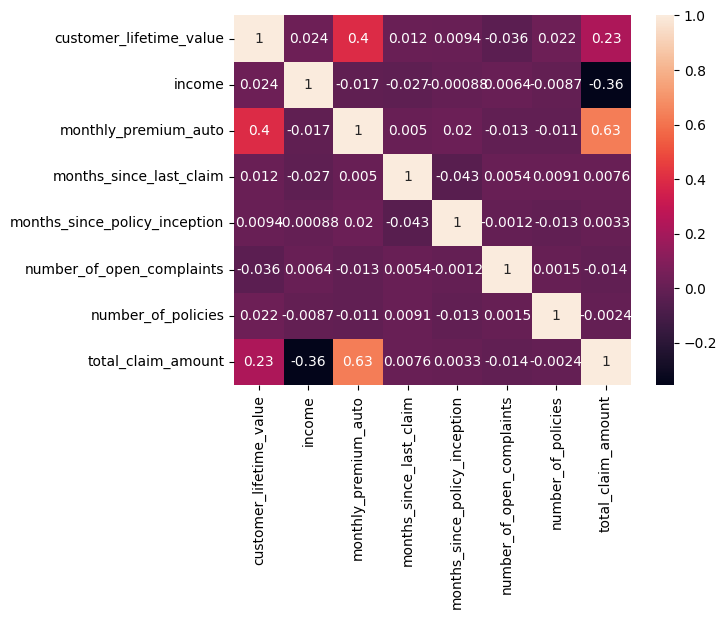

In [14]:
correlation_matrix=numerical_data.corr()
sns.heatmap(correlation_matrix,annot = True)
plt.show()

In [15]:
# we can see that overall there is not to much of a correlation between features,but we have some correlation between monthly premium auto and total_claim_amout which is our target.


In [16]:
# Create a function to plot every discrete variable. Do the same with the continuous variables
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)
def plot_numericals(data,plot_type="line"):
    for column in data.columns:
        plt.figure()
        data[column].plot(kind=plot_type) #You can change 'line' to 'bar', 'hist', 'box', etc., depending on the type of plot you want
        plt.show()
    

In [17]:
#instead of doing 2 functions i decided to do only 1 but you can change the plot type at what fits ur actual dataframe

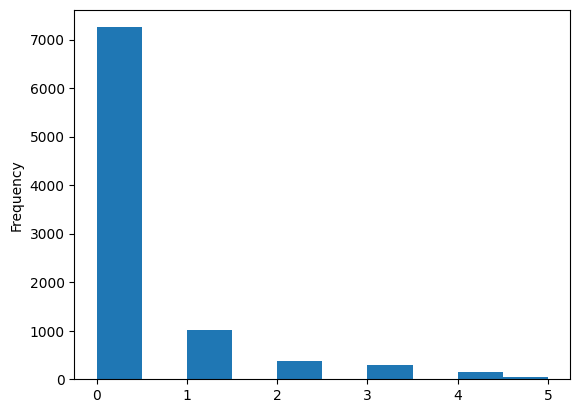

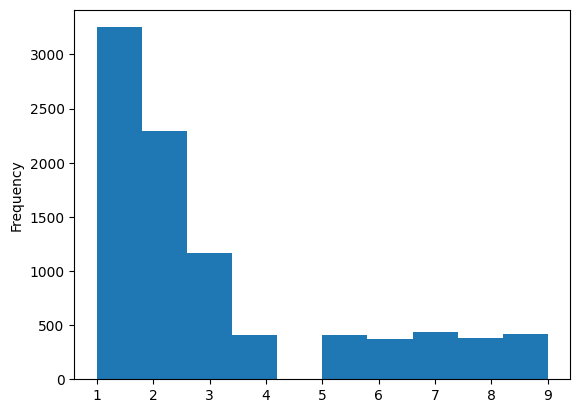

In [18]:
plot_numericals(discrete_df, plot_type="hist")

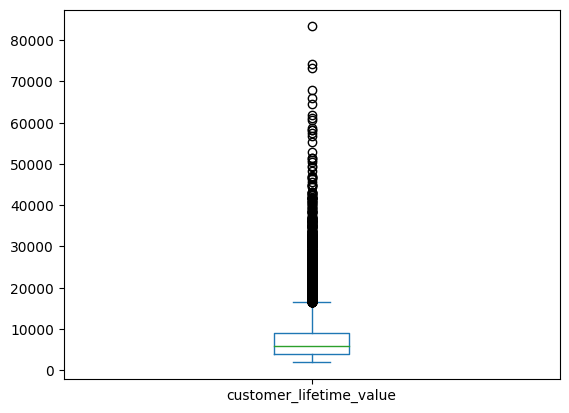

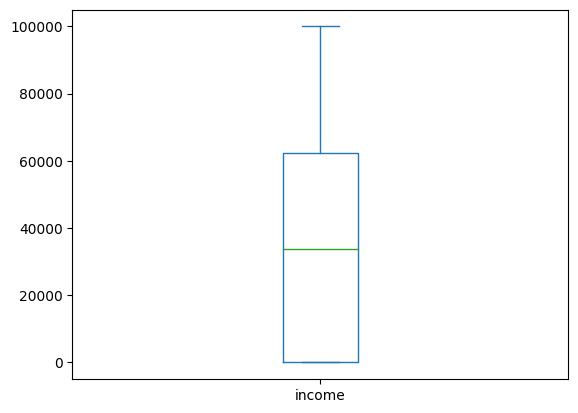

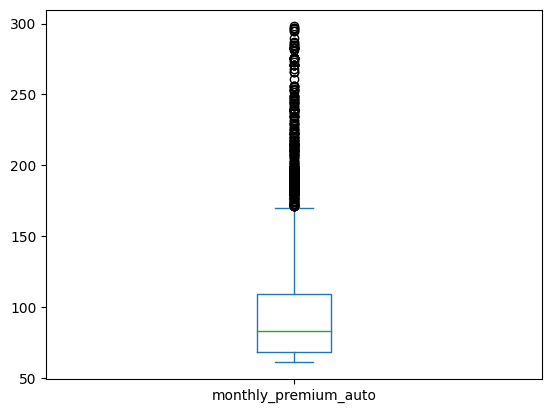

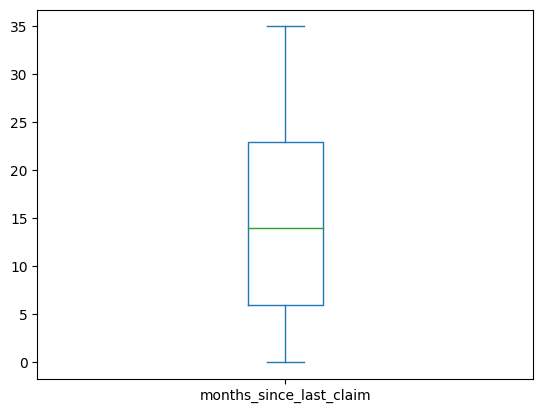

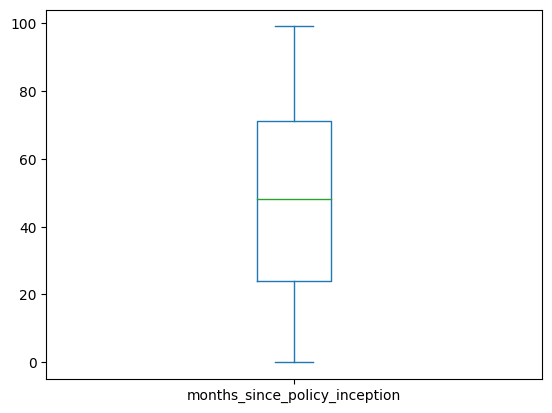

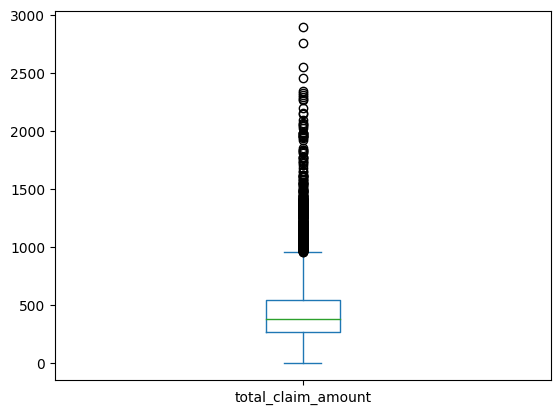

In [19]:
plot_numericals(continous_df, plot_type="box")

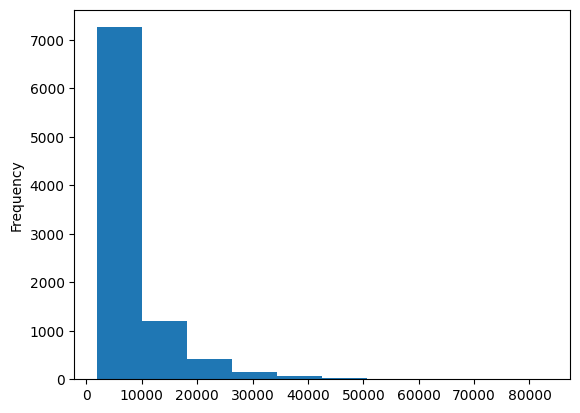

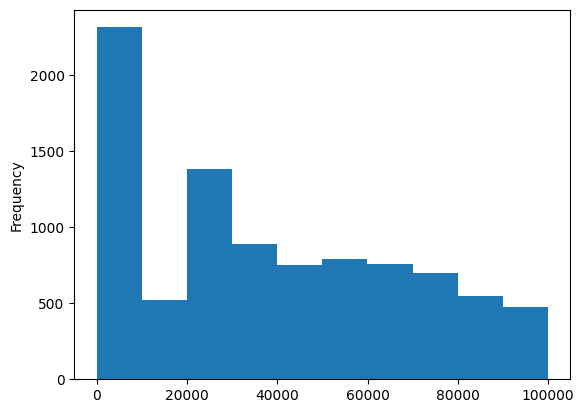

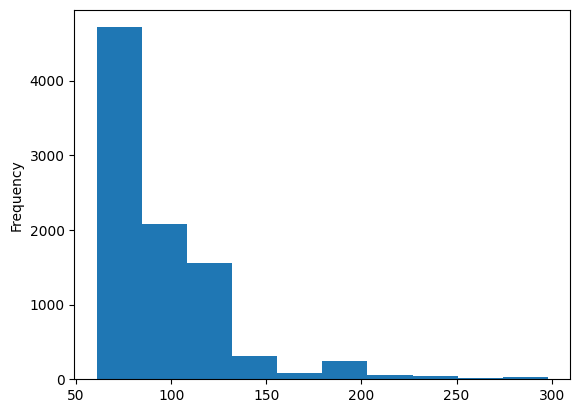

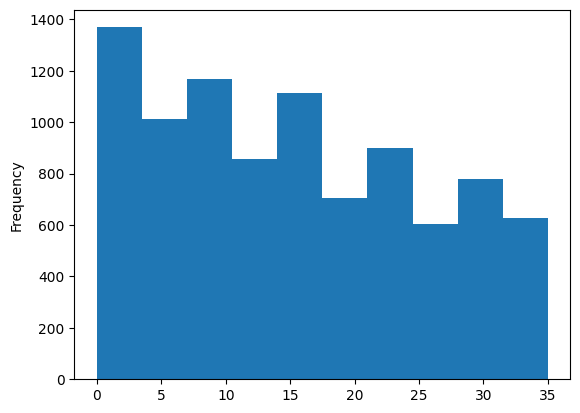

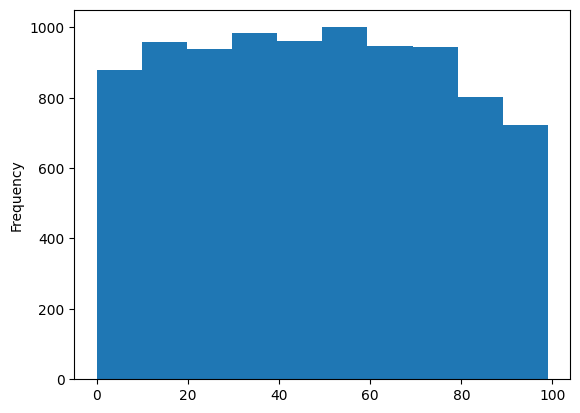

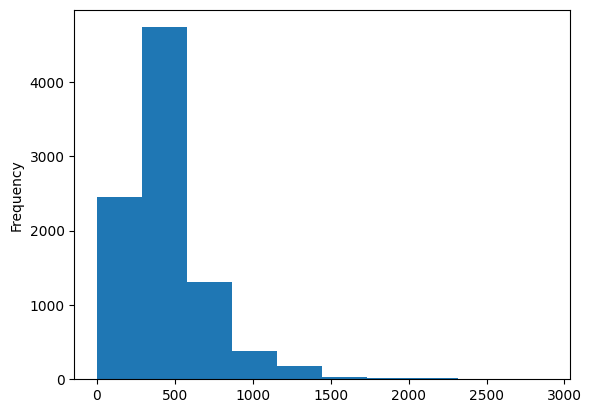

In [20]:
plot_numericals(continous_df, plot_type="hist")

In [21]:
continous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


## Comment what you can see in the plots.

* For the discrete columns i see that both of them are skewed to the right 
* For the continous columns we can observe that 3 of them (total_claim_amount,customer_lifetime_value and monthly premium auto) have some outliers and the other 3 dont have so many values that could be considered outliers.
* for the first 3 that have outliers is skewed to the right with customer_life_time_value being the most exagerate one

### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)


In [22]:
# as i mentioned earlier i see outliers in total_claim_amount,customer_lifetime_value and monthly premium auto

### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [23]:
#i did find outliers and i will use the quantile method to eliminate the most obvious ones.

In [24]:
def remove_outliers_quantile(df,columns):
    for column in columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound= Q1 - 1.5* IQR
        upper_bound = Q3 +1.5 * IQR
        df_clean=df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_clean

In [25]:
columns_to_clean = ["customer_lifetime_value","total_claim_amount","monthly_premium_auto"]
continous_df=remove_outliers_quantile(continous_df,columns_to_clean)
continous_df=continous_df.reset_index(drop = True)
continous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
8699,23405.987980,71941,73,18,89,198.234764
8700,3096.511217,21604,79,14,28,379.200000
8701,8163.890428,0,85,9,37,790.784983
8702,7524.442436,21941,96,34,3,691.200000


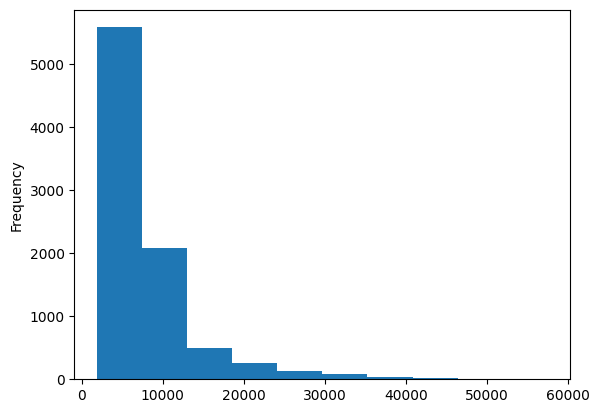

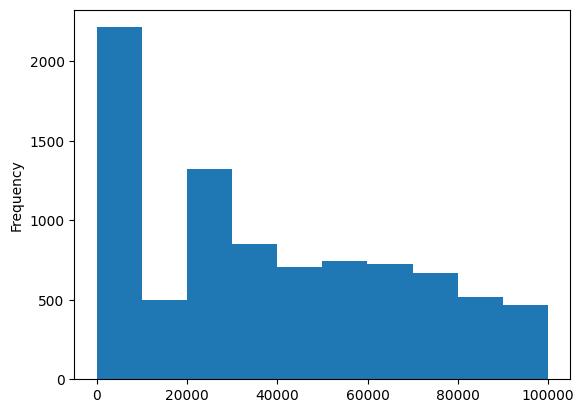

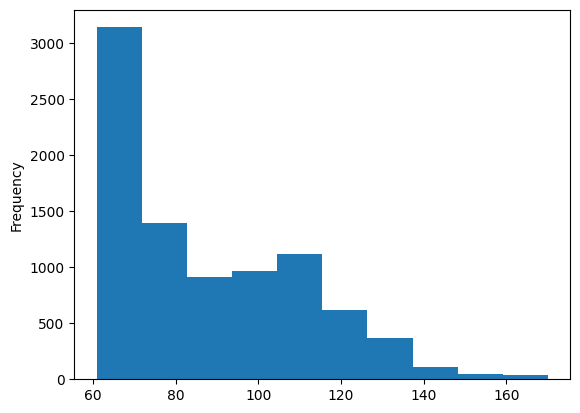

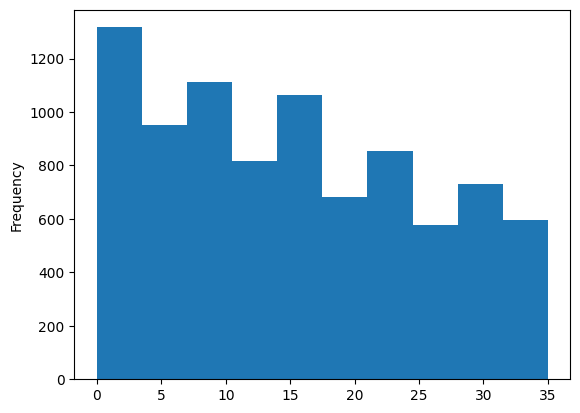

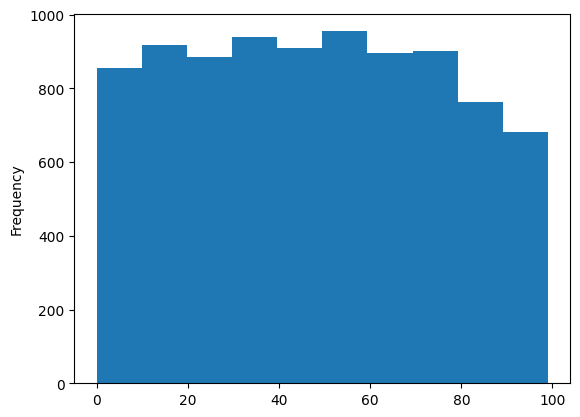

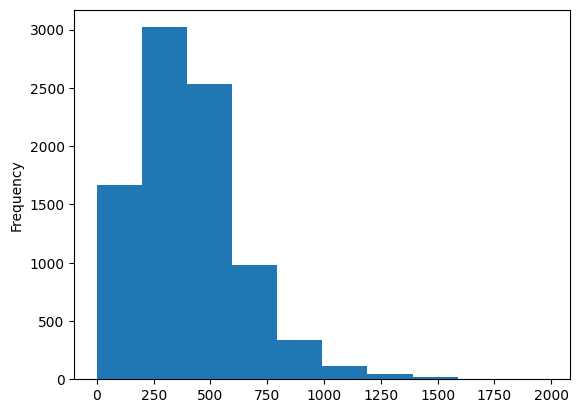

In [26]:
plot_numericals(continous_df,plot_type="hist")

In [27]:
# so now it is still a bit skewed to the right but is more acceptable and it doesnt take so much of the data appart.

### 13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [28]:
#first i will concat them into numerical_df again.
numerical_data=pd.concat([continous_df,discrete_df],axis = 1)
numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1
1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8
2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2
3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7
4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1
...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,0,2
9130,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9131,NaN,NaN,NaN,NaN,NaN,NaN,3,2
9132,NaN,NaN,NaN,NaN,NaN,NaN,0,3


In [29]:
numerical_data.isna().sum()

customer_lifetime_value          430
income                           430
monthly_premium_auto             430
months_since_last_claim          430
months_since_policy_inception    430
total_claim_amount               430
number_of_open_complaints          0
number_of_policies                 0
dtype: int64

In [30]:
#for some reason when i concat the 2 dataframes i get all this rows to be nans,its probably the outliers that i got out .
#i would use the knn approach but it looks like all of the nan values are at the end of the dataframe.
# so since 457 is only a 5% of the data i dont think it will affect to much dropping them.
numerical_data=numerical_data.dropna()
numerical_data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [31]:
numerical_data


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1
1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8
2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2
3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7
4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1
...,...,...,...,...,...,...,...,...
8699,23405.987980,71941.0,73.0,18.0,89.0,198.234764,0,2
8700,3096.511217,21604.0,79.0,14.0,28.0,379.200000,0,7
8701,8163.890428,0.0,85.0,9.0,37.0,790.784983,0,3
8702,7524.442436,21941.0,96.0,34.0,3.0,691.200000,0,2


### 14.Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [32]:
csv_file_path = "files_for_lab/numerical.csv"
numerical_data.to_csv(csv_file_path,index=False)

## Lab part 2, cleaning categoricals

### Instructions

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find  all of the categorical data.  Save it in a categorical_df variable.

3. Check for NaN values and decide what to do with them, do it now.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data?  Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions and do it now.

8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  

9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

10.  Save the cleaned catagorical dataframe as categorical.csv   You will use this file again this week.

2. Find all of the categorical data. Save it in a categorical_df variable.

In [33]:
categorical_df = data.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


3. Check for NaN values and decide what to do with them, do it now.

In [34]:
categorical_df.isna().sum()  #looks like we dont have any nan values on categoricals.

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

4. Check all unique values of columns.

In [35]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

5. Check dtypes. Do they all make sense as categorical data?

In [36]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [37]:
#customer does have alpha and numeric,and since is irrelevant for a model i will just drop it
categorical_df=categorical_df.drop("customer",axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [38]:
#so what if we have 100 columns,better to have a function that check if it has both numbers and letters.

def contains_alpha_and_numeric(series):
    return series.str.contains('[A-Za-z]') & series.str.contains('[0-9]')

In [39]:
alpha_numeric_columns = {column: contains_alpha_and_numeric(categorical_df[column]).any() for column in categorical_df.columns if categorical_df[column].dtype == 'object'}
alpha_numeric_columns

{'state': False,
 'response': False,
 'coverage': False,
 'education': False,
 'employmentstatus': False,
 'gender': False,
 'location_code': False,
 'marital_status': False,
 'policy_type': False,
 'policy': True,
 'renew_offer_type': True,
 'sales_channel': False,
 'vehicle_class': False,
 'vehicle_size': False}

In [40]:
#so we can see that those 2 columns has both alpha and numeric values
categorical_df[["policy","renew_offer_type"]]

,policy,renew_offer_type
0,Corporate L3,Offer1
1,Personal L3,Offer3
2,Personal L3,Offer1
3,Corporate L2,Offer1
4,Personal L1,Offer1
...,...,...
9129,Personal L1,Offer2
9130,Corporate L3,Offer1
9131,Corporate L2,Offer1
9132,Personal L2,Offer3


In [41]:
# "L1" might be a basic policy, "L2" a more comprehensive one, and "L3" the most comprehensive with the
# highest coverage limits or additional benefits
categorical_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [42]:
# but it actually looks like we also have a policy_type column which makes policy be half redundant.
categorical_df["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [43]:
#so i decided to create a new column called policy_level to only store the the amout of each level of policy we have.i will drop the policy column
categorical_df["policy_level"] = categorical_df["policy"].str.extract(r'L(\d)').astype(object)
categorical_df["policy_level"].value_counts()
categorical_df=categorical_df.drop("policy",axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_level
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,3
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,3
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,3
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,2
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,1
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,3
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,2


In [44]:
#now lets tackle the column renew_offer_type
categorical_df["renew_offer_type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [45]:
#since i dont have more info of what the numbers can mean i will just leave it like this.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [46]:
categorical_df["vehicle_class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [47]:
# i just checked some of the columns individually and i dont see anything concerning right now ,but maybe will see in the future.


8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  

In [48]:
#i already commented my thoughts on this previously

9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

In [49]:
unique_values_per_column = categorical_df.nunique()
for column in categorical_df.columns:
    print(f"{column}: {categorical_df[column].nunique()} unique values")

state: 5 unique values
response: 2 unique values
coverage: 3 unique values
education: 5 unique values
employmentstatus: 5 unique values
gender: 2 unique values
location_code: 3 unique values
marital_status: 3 unique values
policy_type: 3 unique values
renew_offer_type: 4 unique values
sales_channel: 4 unique values
vehicle_class: 6 unique values
vehicle_size: 3 unique values
policy_level: 3 unique values


categorical_df["vehicle_class"].value_counts()

In [51]:
# putting together the lowest in count values which seems to have common characteristics.
luxury_types = ['Sports Car', 'Luxury SUV', 'Luxury Car']
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace(luxury_types, 'Luxury')

In [52]:
categorical_df["employmentstatus"].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [62]:
#chaning this column to only employed or unemployed values because the other values are low in quantity.
categorical_df["employmentstatus"]=categorical_df["employmentstatus"].apply(lambda x:"Unemployed" if x not in ["Employed","Unemployed"] else x)
categorical_df["employmentstatus"].value_counts(dropna=False)

Employed      5698
Unemployed    3436
Name: employmentstatus, dtype: int64

In [64]:
categorical_df.nunique()

state               5
response            2
coverage            3
education           5
employmentstatus    2
gender              2
location_code       3
marital_status      3
policy_type         3
renew_offer_type    4
sales_channel       4
vehicle_class       4
vehicle_size        3
policy_level        3
dtype: int64

In [69]:
# i will leave the rest how they are

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [71]:
csv_file_path = "files_for_lab/categorical.csv"
categorical_df.to_csv(csv_file_path,index=False)